In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Import Datasets
df = pd.read_csv('data/newsdata504266with7labels.csv')
df

,Unnamed: 0,body,label,source,title,text
0,0,ঢাকাচট্টগ্রাম মহাসড়কের সীতাকুন্ড উপজেলার ভাটিয়...,national,https://www.banglanews24.com/national/news/bd/...,"চট্টগ্রামে দুর্ঘটনায় গার্মেন্টস কর্মী নিহত, আহ...",ঢাকাচট্টগ্রাম মহাসড়কের সীতাকুন্ড উপজেলার ভাটিয়...
1,1,নীলফামারী সদর উপজেলার টুপামারী ইউনিয়নের কামারপ...,national,https://www.banglanews24.com/national/news/bd/...,নীলফামারীতে স্ত্রীকে পিটিয়ে হত্যার ঘটনায় মামলা,নীলফামারী সদর উপজেলার টুপামারী ইউনিয়নের কামারপ...
2,2,সিরিজের একমাত্র টেস্টে আগামীকাল মুখোমুখি হবে ব...,sports,https://www.jagonews24.com/special-reports/new...,উইকেট দেখে হতাশ টাইগার শিবির,সিরিজের একমাত্র টেস্টে আগামীকাল মুখোমুখি বাংলা...
3,3,অনলাইন ডেস্ক পাকিস্তানের বেলুচিস্তান প্রদেশের ...,international,https://www.dailyjanakantha.com/details/articl...,\nপাকিস্তানের কোয়েটায় পুলিশ ট্রেনিং কলেজে সন্ত...,অনলাইন ডেস্ক পাকিস্তানের বেলুচিস্তান প্রদেশের ...
4,4,ফিলিস্তিনের পশ্চিমতীরে ইসরায়েলী পুলিশের সঙ্গে ...,international,https://www.jagonews24.com/special-reports/new...,"পশ্চিমতীরে সংঘর্ষে নিহত ১, আহত দুই শতাধিক",ফিলিস্তিনের পশ্চিমতীরে ইসরায়েলী পুলিশের সংঘর্ষ...
...,...,...,...,...,...,...
504261,504261,মাধুর ভান্ডাকারের সমালোচিত ছবি হিরোইনএর জুনিয়র...,entertainment,https://www.banglanews24.com/national/news/bd/...,নৃশংস হত্যার শিকার ‘হিরোইন’ ছবির অভিনেত্রী মিন...,মাধুর ভান্ডাকারের সমালোচিত ছবি হিরোইনএর জুনিয়র...
504262,504262,ছয় মাসের প্রস্তুতিতে এসএ গেমস খেলতে নেপালে এসে...,sports,https://www.dailyinqilab.com/article/252218/,খো খো’র ছেলেদের রৌপ্য,ছয় মাসের প্রস্তুতিতে এসএ গেমস খেলতে নেপালে এসে...
504263,504263,গেল বছরের শেষে দহন সিনেমা দিয়ে দর্শক মাতিয়েছেন...,entertainment,https://www.jagonews24.com/special-reports/new...,কলকাতার দুই নায়কের সঙ্গে ট্রেলারেই পূজার চমক,বছরের শেষে দহন সিনেমা দিয়ে দর্শক মাতিয়েছেন পূজ...
504264,504264,করোনায় আক্রান্ত শেষ রোগী সুস্থ হয়ে হাসপাতাল ছা...,international,https://www.jagonews24.com/special-reports/new...,"করোনামুক্ত হলো ফিজি, মারা যাননি একজনও",করোনায় আক্রান্ত শেষ রোগী সুস্থ হয়ে হাসপাতাল ছা...


In [3]:
df1 = df.drop(columns=['Unnamed: 0'])
df1

,body,label,source,title,text
0,ঢাকাচট্টগ্রাম মহাসড়কের সীতাকুন্ড উপজেলার ভাটিয়...,national,https://www.banglanews24.com/national/news/bd/...,"চট্টগ্রামে দুর্ঘটনায় গার্মেন্টস কর্মী নিহত, আহ...",ঢাকাচট্টগ্রাম মহাসড়কের সীতাকুন্ড উপজেলার ভাটিয়...
1,নীলফামারী সদর উপজেলার টুপামারী ইউনিয়নের কামারপ...,national,https://www.banglanews24.com/national/news/bd/...,নীলফামারীতে স্ত্রীকে পিটিয়ে হত্যার ঘটনায় মামলা,নীলফামারী সদর উপজেলার টুপামারী ইউনিয়নের কামারপ...
2,সিরিজের একমাত্র টেস্টে আগামীকাল মুখোমুখি হবে ব...,sports,https://www.jagonews24.com/special-reports/new...,উইকেট দেখে হতাশ টাইগার শিবির,সিরিজের একমাত্র টেস্টে আগামীকাল মুখোমুখি বাংলা...
3,অনলাইন ডেস্ক পাকিস্তানের বেলুচিস্তান প্রদেশের ...,international,https://www.dailyjanakantha.com/details/articl...,\nপাকিস্তানের কোয়েটায় পুলিশ ট্রেনিং কলেজে সন্ত...,অনলাইন ডেস্ক পাকিস্তানের বেলুচিস্তান প্রদেশের ...
4,ফিলিস্তিনের পশ্চিমতীরে ইসরায়েলী পুলিশের সঙ্গে ...,international,https://www.jagonews24.com/special-reports/new...,"পশ্চিমতীরে সংঘর্ষে নিহত ১, আহত দুই শতাধিক",ফিলিস্তিনের পশ্চিমতীরে ইসরায়েলী পুলিশের সংঘর্ষ...
...,...,...,...,...,...
504261,মাধুর ভান্ডাকারের সমালোচিত ছবি হিরোইনএর জুনিয়র...,entertainment,https://www.banglanews24.com/national/news/bd/...,নৃশংস হত্যার শিকার ‘হিরোইন’ ছবির অভিনেত্রী মিন...,মাধুর ভান্ডাকারের সমালোচিত ছবি হিরোইনএর জুনিয়র...
504262,ছয় মাসের প্রস্তুতিতে এসএ গেমস খেলতে নেপালে এসে...,sports,https://www.dailyinqilab.com/article/252218/,খো খো’র ছেলেদের রৌপ্য,ছয় মাসের প্রস্তুতিতে এসএ গেমস খেলতে নেপালে এসে...
504263,গেল বছরের শেষে দহন সিনেমা দিয়ে দর্শক মাতিয়েছেন...,entertainment,https://www.jagonews24.com/special-reports/new...,কলকাতার দুই নায়কের সঙ্গে ট্রেলারেই পূজার চমক,বছরের শেষে দহন সিনেমা দিয়ে দর্শক মাতিয়েছেন পূজ...
504264,করোনায় আক্রান্ত শেষ রোগী সুস্থ হয়ে হাসপাতাল ছা...,international,https://www.jagonews24.com/special-reports/new...,"করোনামুক্ত হলো ফিজি, মারা যাননি একজনও",করোনায় আক্রান্ত শেষ রোগী সুস্থ হয়ে হাসপাতাল ছা...


In [4]:
df1.label.unique()

array(['national', 'sports', 'international', 'all_bangladesh',
       'politics', 'economics-business', 'entertainment'], dtype=object)

In [5]:
# Check NA counts
df1.isnull().sum()

body      0
label     0
source    0
title     0
text      0
dtype: int64

In [6]:
# Look at classification type counts
counts = df1.label.value_counts()
print(counts)

sports                86749
international         84742
national              84431
all_bangladesh        81176
politics              66142
entertainment         53975
economics-business    47051
Name: label, dtype: int64


In [7]:
# Drop rows with missing values
model_f = df1.dropna()
print('%d is the number of data that have a news body' %model_f.shape[0])

504266 is the number of data that have a news body


In [8]:
model_f.shape

(504266, 5)

In [9]:
model_f.reset_index(drop=True)

,body,label,source,title,text
0,ঢাকাচট্টগ্রাম মহাসড়কের সীতাকুন্ড উপজেলার ভাটিয়...,national,https://www.banglanews24.com/national/news/bd/...,"চট্টগ্রামে দুর্ঘটনায় গার্মেন্টস কর্মী নিহত, আহ...",ঢাকাচট্টগ্রাম মহাসড়কের সীতাকুন্ড উপজেলার ভাটিয়...
1,নীলফামারী সদর উপজেলার টুপামারী ইউনিয়নের কামারপ...,national,https://www.banglanews24.com/national/news/bd/...,নীলফামারীতে স্ত্রীকে পিটিয়ে হত্যার ঘটনায় মামলা,নীলফামারী সদর উপজেলার টুপামারী ইউনিয়নের কামারপ...
2,সিরিজের একমাত্র টেস্টে আগামীকাল মুখোমুখি হবে ব...,sports,https://www.jagonews24.com/special-reports/new...,উইকেট দেখে হতাশ টাইগার শিবির,সিরিজের একমাত্র টেস্টে আগামীকাল মুখোমুখি বাংলা...
3,অনলাইন ডেস্ক পাকিস্তানের বেলুচিস্তান প্রদেশের ...,international,https://www.dailyjanakantha.com/details/articl...,\nপাকিস্তানের কোয়েটায় পুলিশ ট্রেনিং কলেজে সন্ত...,অনলাইন ডেস্ক পাকিস্তানের বেলুচিস্তান প্রদেশের ...
4,ফিলিস্তিনের পশ্চিমতীরে ইসরায়েলী পুলিশের সঙ্গে ...,international,https://www.jagonews24.com/special-reports/new...,"পশ্চিমতীরে সংঘর্ষে নিহত ১, আহত দুই শতাধিক",ফিলিস্তিনের পশ্চিমতীরে ইসরায়েলী পুলিশের সংঘর্ষ...
...,...,...,...,...,...
504261,মাধুর ভান্ডাকারের সমালোচিত ছবি হিরোইনএর জুনিয়র...,entertainment,https://www.banglanews24.com/national/news/bd/...,নৃশংস হত্যার শিকার ‘হিরোইন’ ছবির অভিনেত্রী মিন...,মাধুর ভান্ডাকারের সমালোচিত ছবি হিরোইনএর জুনিয়র...
504262,ছয় মাসের প্রস্তুতিতে এসএ গেমস খেলতে নেপালে এসে...,sports,https://www.dailyinqilab.com/article/252218/,খো খো’র ছেলেদের রৌপ্য,ছয় মাসের প্রস্তুতিতে এসএ গেমস খেলতে নেপালে এসে...
504263,গেল বছরের শেষে দহন সিনেমা দিয়ে দর্শক মাতিয়েছেন...,entertainment,https://www.jagonews24.com/special-reports/new...,কলকাতার দুই নায়কের সঙ্গে ট্রেলারেই পূজার চমক,বছরের শেষে দহন সিনেমা দিয়ে দর্শক মাতিয়েছেন পূজ...
504264,করোনায় আক্রান্ত শেষ রোগী সুস্থ হয়ে হাসপাতাল ছা...,international,https://www.jagonews24.com/special-reports/new...,"করোনামুক্ত হলো ফিজি, মারা যাননি একজনও",করোনায় আক্রান্ত শেষ রোগী সুস্থ হয়ে হাসপাতাল ছা...


sports                86749
international         84742
national              84431
all_bangladesh        81176
politics              66142
entertainment         53975
economics-business    47051
Name: label, dtype: int64


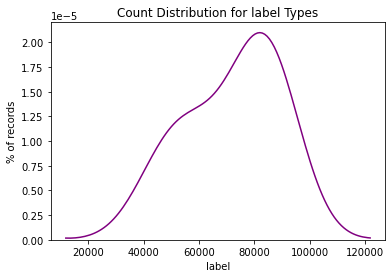

In [10]:
# Look at classification type counts
counts = model_f.label.value_counts()
print(counts)

#plot counts
plt.figure()
sns.distplot(counts, hist = False, color = 'purple')
plt.title('Count Distribution for label Types')
plt.ylabel('% of records')
plt.show()

In [11]:
counts = model_f.label.value_counts()
print(counts)
print(len(counts))

sports                86749
international         84742
national              84431
all_bangladesh        81176
politics              66142
entertainment         53975
economics-business    47051
Name: label, dtype: int64
7


In [12]:
model_f.shape

(504266, 5)

In [13]:
max_length=model_f["body"].str.len().max()
max_length

4959

In [14]:
min_length=model_f["body"].str.len().min()
min_length

500

In [15]:
model_f1 = model_f.copy(deep = True)
model_f1.shape

(504266, 5)

In [16]:
model_f1.drop(model_f[model_f1['body'].str.len() < 300].index, inplace = True)

In [17]:
model_f1.shape

(504266, 5)

In [19]:
model_f1.reset_index(drop=True)

,body,label,source,title,text
0,ঢাকাচট্টগ্রাম মহাসড়কের সীতাকুন্ড উপজেলার ভাটিয়...,national,https://www.banglanews24.com/national/news/bd/...,"চট্টগ্রামে দুর্ঘটনায় গার্মেন্টস কর্মী নিহত, আহ...",ঢাকাচট্টগ্রাম মহাসড়কের সীতাকুন্ড উপজেলার ভাটিয়...
1,নীলফামারী সদর উপজেলার টুপামারী ইউনিয়নের কামারপ...,national,https://www.banglanews24.com/national/news/bd/...,নীলফামারীতে স্ত্রীকে পিটিয়ে হত্যার ঘটনায় মামলা,নীলফামারী সদর উপজেলার টুপামারী ইউনিয়নের কামারপ...
2,সিরিজের একমাত্র টেস্টে আগামীকাল মুখোমুখি হবে ব...,sports,https://www.jagonews24.com/special-reports/new...,উইকেট দেখে হতাশ টাইগার শিবির,সিরিজের একমাত্র টেস্টে আগামীকাল মুখোমুখি বাংলা...
3,অনলাইন ডেস্ক পাকিস্তানের বেলুচিস্তান প্রদেশের ...,international,https://www.dailyjanakantha.com/details/articl...,\nপাকিস্তানের কোয়েটায় পুলিশ ট্রেনিং কলেজে সন্ত...,অনলাইন ডেস্ক পাকিস্তানের বেলুচিস্তান প্রদেশের ...
4,ফিলিস্তিনের পশ্চিমতীরে ইসরায়েলী পুলিশের সঙ্গে ...,international,https://www.jagonews24.com/special-reports/new...,"পশ্চিমতীরে সংঘর্ষে নিহত ১, আহত দুই শতাধিক",ফিলিস্তিনের পশ্চিমতীরে ইসরায়েলী পুলিশের সংঘর্ষ...
...,...,...,...,...,...
504261,মাধুর ভান্ডাকারের সমালোচিত ছবি হিরোইনএর জুনিয়র...,entertainment,https://www.banglanews24.com/national/news/bd/...,নৃশংস হত্যার শিকার ‘হিরোইন’ ছবির অভিনেত্রী মিন...,মাধুর ভান্ডাকারের সমালোচিত ছবি হিরোইনএর জুনিয়র...
504262,ছয় মাসের প্রস্তুতিতে এসএ গেমস খেলতে নেপালে এসে...,sports,https://www.dailyinqilab.com/article/252218/,খো খো’র ছেলেদের রৌপ্য,ছয় মাসের প্রস্তুতিতে এসএ গেমস খেলতে নেপালে এসে...
504263,গেল বছরের শেষে দহন সিনেমা দিয়ে দর্শক মাতিয়েছেন...,entertainment,https://www.jagonews24.com/special-reports/new...,কলকাতার দুই নায়কের সঙ্গে ট্রেলারেই পূজার চমক,বছরের শেষে দহন সিনেমা দিয়ে দর্শক মাতিয়েছেন পূজ...
504264,করোনায় আক্রান্ত শেষ রোগী সুস্থ হয়ে হাসপাতাল ছা...,international,https://www.jagonews24.com/special-reports/new...,"করোনামুক্ত হলো ফিজি, মারা যাননি একজনও",করোনায় আক্রান্ত শেষ রোগী সুস্থ হয়ে হাসপাতাল ছা...


In [18]:
# Look at classification type counts
counts = model_f1.label.value_counts()
print(counts)
print(len(counts))

sports                86749
international         84742
national              84431
all_bangladesh        81176
politics              66142
entertainment         53975
economics-business    47051
Name: label, dtype: int64
7


In [19]:
model_f1.shape

(504266, 5)

In [20]:
# Get classification types where counts are over 1000
#types = np.asarray(counts[(counts > 1000)].index)
types=['national'
,'all_bangladesh'
,'sports'
,'politics'
,'international'
,'entertainment'
,'economics-business'
]

# Filter dataset's records for classification types > 1000
data = model_f1[model_f1.label.isin(types)]

#data_m = data[(data['classification'] =='HYDROLASE' )  (data['classification'] =='LIGASE' ) or (data['classification'] =='TRANSFERASE' ) or (data['classification'] =='OXIDOREDUCTASE' ) or (data['classification'] =='ISOMERASE' ) or (data['classification'] =='LYASE' )]

print(types)
print(len(types))
print('%d is the number of records in the final filtered dataset' %data.shape[0])

['national', 'all_bangladesh', 'sports', 'politics', 'international', 'entertainment', 'economics-business']
7
504266 is the number of records in the final filtered dataset


In [21]:
train=data
a=train.label.unique()
l=len(train.label.unique())
print(a)
print(len(a))

['national' 'sports' 'international' 'all_bangladesh' 'politics'
 'economics-business' 'entertainment']
7


In [24]:
for i in range (l):
    train.label = train.label.replace(a[i], i)

In [25]:
train.reset_index(drop=True)

,body,label,source,title,text
0,ঢাকাচট্টগ্রাম মহাসড়কের সীতাকুন্ড উপজেলার ভাটিয়...,0,https://www.banglanews24.com/national/news/bd/...,"চট্টগ্রামে দুর্ঘটনায় গার্মেন্টস কর্মী নিহত, আহ...",ঢাকাচট্টগ্রাম মহাসড়কের সীতাকুন্ড উপজেলার ভাটিয়...
1,নীলফামারী সদর উপজেলার টুপামারী ইউনিয়নের কামারপ...,0,https://www.banglanews24.com/national/news/bd/...,নীলফামারীতে স্ত্রীকে পিটিয়ে হত্যার ঘটনায় মামলা,নীলফামারী সদর উপজেলার টুপামারী ইউনিয়নের কামারপ...
2,সিরিজের একমাত্র টেস্টে আগামীকাল মুখোমুখি হবে ব...,1,https://www.jagonews24.com/special-reports/new...,উইকেট দেখে হতাশ টাইগার শিবির,সিরিজের একমাত্র টেস্টে আগামীকাল মুখোমুখি বাংলা...
3,অনলাইন ডেস্ক পাকিস্তানের বেলুচিস্তান প্রদেশের ...,2,https://www.dailyjanakantha.com/details/articl...,\nপাকিস্তানের কোয়েটায় পুলিশ ট্রেনিং কলেজে সন্ত...,অনলাইন ডেস্ক পাকিস্তানের বেলুচিস্তান প্রদেশের ...
4,ফিলিস্তিনের পশ্চিমতীরে ইসরায়েলী পুলিশের সঙ্গে ...,2,https://www.jagonews24.com/special-reports/new...,"পশ্চিমতীরে সংঘর্ষে নিহত ১, আহত দুই শতাধিক",ফিলিস্তিনের পশ্চিমতীরে ইসরায়েলী পুলিশের সংঘর্ষ...
...,...,...,...,...,...
504261,মাধুর ভান্ডাকারের সমালোচিত ছবি হিরোইনএর জুনিয়র...,6,https://www.banglanews24.com/national/news/bd/...,নৃশংস হত্যার শিকার ‘হিরোইন’ ছবির অভিনেত্রী মিন...,মাধুর ভান্ডাকারের সমালোচিত ছবি হিরোইনএর জুনিয়র...
504262,ছয় মাসের প্রস্তুতিতে এসএ গেমস খেলতে নেপালে এসে...,1,https://www.dailyinqilab.com/article/252218/,খো খো’র ছেলেদের রৌপ্য,ছয় মাসের প্রস্তুতিতে এসএ গেমস খেলতে নেপালে এসে...
504263,গেল বছরের শেষে দহন সিনেমা দিয়ে দর্শক মাতিয়েছেন...,6,https://www.jagonews24.com/special-reports/new...,কলকাতার দুই নায়কের সঙ্গে ট্রেলারেই পূজার চমক,বছরের শেষে দহন সিনেমা দিয়ে দর্শক মাতিয়েছেন পূজ...
504264,করোনায় আক্রান্ত শেষ রোগী সুস্থ হয়ে হাসপাতাল ছা...,2,https://www.jagonews24.com/special-reports/new...,"করোনামুক্ত হলো ফিজি, মারা যাননি একজনও",করোনায় আক্রান্ত শেষ রোগী সুস্থ হয়ে হাসপাতাল ছা...


In [26]:
train.label.value_counts()

1    86749
2    84742
0    84431
3    81176
4    66142
6    53975
5    47051
Name: label, dtype: int64

In [27]:
df = train
# df12 = train[['body','label','source','title']]
df1 = df[['text','label']]
df1.reset_index(drop =True)

,text,label
0,ঢাকাচট্টগ্রাম মহাসড়কের সীতাকুন্ড উপজেলার ভাটিয়...,0
1,নীলফামারী সদর উপজেলার টুপামারী ইউনিয়নের কামারপ...,0
2,সিরিজের একমাত্র টেস্টে আগামীকাল মুখোমুখি বাংলা...,1
3,অনলাইন ডেস্ক পাকিস্তানের বেলুচিস্তান প্রদেশের ...,2
4,ফিলিস্তিনের পশ্চিমতীরে ইসরায়েলী পুলিশের সংঘর্ষ...,2
...,...,...
504261,মাধুর ভান্ডাকারের সমালোচিত ছবি হিরোইনএর জুনিয়র...,6
504262,ছয় মাসের প্রস্তুতিতে এসএ গেমস খেলতে নেপালে এসে...,1
504263,বছরের শেষে দহন সিনেমা দিয়ে দর্শক মাতিয়েছেন পূজ...,6
504264,করোনায় আক্রান্ত শেষ রোগী সুস্থ হয়ে হাসপাতাল ছা...,2


In [28]:
df1.head()

,text,label
0,ঢাকাচট্টগ্রাম মহাসড়কের সীতাকুন্ড উপজেলার ভাটিয়...,0
1,নীলফামারী সদর উপজেলার টুপামারী ইউনিয়নের কামারপ...,0
2,সিরিজের একমাত্র টেস্টে আগামীকাল মুখোমুখি বাংলা...,1
3,অনলাইন ডেস্ক পাকিস্তানের বেলুচিস্তান প্রদেশের ...,2
4,ফিলিস্তিনের পশ্চিমতীরে ইসরায়েলী পুলিশের সংঘর্ষ...,2


In [29]:
X=df1['text']
Y=df1['label']

In [30]:
# 3). ----- Train Test Split -----

# Split Data
X_train, X_test,y_train,y_test = train_test_split(X, Y, test_size = 0.10, random_state = 1)

# Create a Count Vectorizer to gather the unique elements in sequence
vect = CountVectorizer(analyzer = 'char_wb', ngram_range = (4,4))

# Fit and Transform CountVectorizer
vect.fit(X_train)
X_train_df = vect.transform(X_train)
X_test_df = vect.transform(X_test)

#Print a few of the features
print(vect.get_feature_names()[-20:])

['৷হায', '৷হাস', '৷হিন', '৷হিম', '৷হিল', '৷হুএ', '৷হুথ', '৷হুম', '৷হেম', '৷হেল', '৷হ্য', '৷ের ', '৻উপস', '৻উৎস', '৻এখন', '৻কর্', '৻টেল', '৻পপ ', '৻প্র', '৻সাল']


In [31]:
# 4). ------ Machine Learning Models ------

# Make a prediction dictionary to store accuracys
prediction = dict()

# Naive Bayes Model
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_df, y_train)
predicted_classes = model.predict(X_test_df)
prediction["MultinomialNB"] = accuracy_score(predicted_classes, y_test)
print( prediction['MultinomialNB'])

0.8456382493505463


In [32]:
review = ["শাবনূর বাংলাদেশের চলচ্চিত্র ইতিহাসের তুমুল জনপ্রিয় অভিনেত্রী। ৯০ দশক থেকে এ পর্যন্ত আসা চিত্র তারকাদের মধ্যে সবচেয়ে জনপ্রিয় চিত্র তারকা হিসেবে বিবেচনা করা হয় তাকে। প্রখ্যাত চলচ্চিত্রকার এহতেশাম পরিচালিত 'চাঁদনী রাতে' ছবি মাধ্যমে চলচ্চিত্রে আসেন শাবনূর। প্রথম ছবি ব্যর্থ হলেও পরে সালমান শাহের সাথে জুটি গড়ে ব্যাপক জনপ্রিয়তা পান। একে একে এ জুটি সুপারহিট ছবি দিতে থাকেন। সালমানের অকাল মৃত্যুতে সাময়িক ভাবে শাবনূরের ক্যারিয়ার হুমকির মুখে পড়লেও তার চিরায়ত বাঙালি প্রেমিকার ইমেজ এবং অসাধারণ অভিনয় ক্ষমতা তাকে দর্শকদের হৃদয়ে শক্ত আসন গড়তে সাহায্য করে। পরে রিয়াজ, শাকিল খান, ফেরদৌস ও শাকিব খান এর সাথে জনপ্রিয় জুটি গড়ে অসংখ্য ব্যবসাসফল ও জনপ্রিয় ছবি উপহার দেন। একতা সময় ক্যারিয়ারে ভাটা পড়ে। বর্তমানে পর্দায় নেই তিনি। তবে জানালেন ব্যস্ত তিনি। গণমাধ্যমকে শাবনূর বলেন, এখন আমি আগের চেয়েও বেশি। আমার ছেলে ও পরিবার নিয়ে অনেক ব্যস্ত সময় কীভাবে কেটে যায় টেরই পাই না। তাছাড়া সিডনি ইন্টারন্যাশনাল স্কুল নামে একটা স্কুল আছে। সেটা নিয়ে প্রচুর ব্যস্ত থাকতে হয়।"]
review_vector = vect.transform(review) # vectorizing
print(model.predict(review_vector))

[6]


In [33]:
# from sklearn.externals import joblib
import joblib as joblib
# Save the model as a pickle in a file
joblib.dump(model, 'naive_bayes.pkl')

['naive_bayes.pkl']

In [34]:
# Load the model from the file
naive = joblib.load('naive_bayes.pkl') 
# Use the loaded model to make predictions

In [35]:
review = ["শাবনূর বাংলাদেশের চলচ্চিত্র ইতিহাসের তুমুল জনপ্রিয় অভিনেত্রী। ৯০ দশক থেকে এ পর্যন্ত আসা চিত্র তারকাদের মধ্যে সবচেয়ে জনপ্রিয় চিত্র তারকা হিসেবে বিবেচনা করা হয় তাকে। প্রখ্যাত চলচ্চিত্রকার এহতেশাম পরিচালিত 'চাঁদনী রাতে' ছবি মাধ্যমে চলচ্চিত্রে আসেন শাবনূর। প্রথম ছবি ব্যর্থ হলেও পরে সালমান শাহের সাথে জুটি গড়ে ব্যাপক জনপ্রিয়তা পান। একে একে এ জুটি সুপারহিট ছবি দিতে থাকেন। সালমানের অকাল মৃত্যুতে সাময়িক ভাবে শাবনূরের ক্যারিয়ার হুমকির মুখে পড়লেও তার চিরায়ত বাঙালি প্রেমিকার ইমেজ এবং অসাধারণ অভিনয় ক্ষমতা তাকে দর্শকদের হৃদয়ে শক্ত আসন গড়তে সাহায্য করে। পরে রিয়াজ, শাকিল খান, ফেরদৌস ও শাকিব খান এর সাথে জনপ্রিয় জুটি গড়ে অসংখ্য ব্যবসাসফল ও জনপ্রিয় ছবি উপহার দেন। একতা সময় ক্যারিয়ারে ভাটা পড়ে। বর্তমানে পর্দায় নেই তিনি। তবে জানালেন ব্যস্ত তিনি। গণমাধ্যমকে শাবনূর বলেন, এখন আমি আগের চেয়েও বেশি। আমার ছেলে ও পরিবার নিয়ে অনেক ব্যস্ত সময় কীভাবে কেটে যায় টেরই পাই না। তাছাড়া সিডনি ইন্টারন্যাশনাল স্কুল নামে একটা স্কুল আছে। সেটা নিয়ে প্রচুর ব্যস্ত থাকতে হয়।"]
review_vector = vect.transform(review) # vectorizing
print(naive.predict(review_vector))

[6]


In [36]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(7)]
print(classification_report(y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.71      0.63      0.66      8373
     Class 1       0.99      0.95      0.97      8679
     Class 2       0.94      0.94      0.94      8635
     Class 3       0.79      0.80      0.80      8071
     Class 4       0.73      0.81      0.77      6543
     Class 5       0.84      0.90      0.87      4705
     Class 6       0.89      0.93      0.91      5421

    accuracy                           0.85     50427
   macro avg       0.84      0.85      0.85     50427
weighted avg       0.85      0.85      0.84     50427



In [37]:
name=[]
for i in range(7):
  name.append(i)

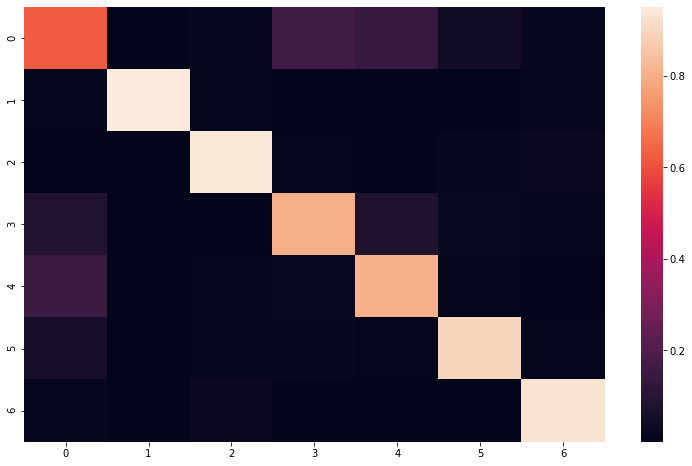

In [38]:
# Plot confusion matrix
conf_mat = confusion_matrix(y_test, predicted_classes, labels = name)
#Normalize confusion_matrix
conf_mat = conf_mat.astype('float')/ conf_mat.sum(axis=1)[:, np.newaxis]
# Plot Heat Map
fig , ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.heatmap(conf_mat)

Automatically created module for IPython interactive environment
Confusion matrix, without normalization
[[5240    9  143 1345 1145  349  142]
 [  96 8253  110   46   38   37   99]
 [  48    7 8120   73   20  143  224]
 [ 675    3   33 6493  622  176   69]
 [1007    1   57  125 5277   58   18]
 [ 267    2   55   76   49 4216   40]
 [  88   40  155   27   41   26 5044]]
Normalized confusion matrix
[[6.26e-01 1.07e-03 1.71e-02 1.61e-01 1.37e-01 4.17e-02 1.70e-02]
 [1.11e-02 9.51e-01 1.27e-02 5.30e-03 4.38e-03 4.26e-03 1.14e-02]
 [5.56e-03 8.11e-04 9.40e-01 8.45e-03 2.32e-03 1.66e-02 2.59e-02]
 [8.36e-02 3.72e-04 4.09e-03 8.04e-01 7.71e-02 2.18e-02 8.55e-03]
 [1.54e-01 1.53e-04 8.71e-03 1.91e-02 8.07e-01 8.86e-03 2.75e-03]
 [5.67e-02 4.25e-04 1.17e-02 1.62e-02 1.04e-02 8.96e-01 8.50e-03]
 [1.62e-02 7.38e-03 2.86e-02 4.98e-03 7.56e-03 4.80e-03 9.30e-01]]


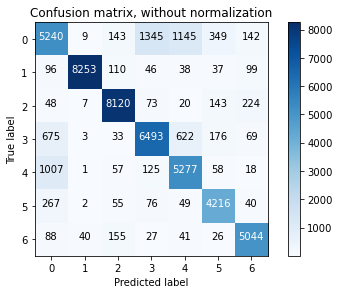

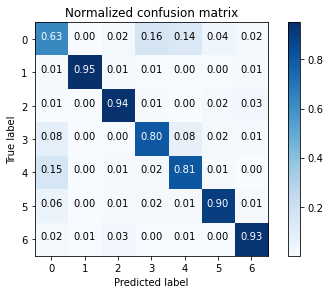

In [40]:
print(__doc__)

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


class_names = name

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predicted_classes)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()